In [3]:
import pandas as pd
import folium
from folium.plugins import HeatMap

In [4]:
#Extracion de los datos
df_tot = pd.read_csv("/home/mirp_ai/Documents/Daniel_Nieto/PhD/AutoEncoders_Ecoacoustics/Zamuro/Complementary_Files/UDAS Pasivo_20221001_Zamuro.csv", )

In [28]:
#Extraer la columnas importantes
import numpy as np
df = df_tot.loc[:, ["latitude_IG", "longitud_IG"]]
df["number"] = np.random.randint(0,500,106)

In [18]:
df

,latitude_IG,longitud_IG,number
0,3.555860,-73.411659,20
1,3.552269,-73.411659,42
2,3.548784,-73.411520,21
3,3.548641,-73.411726,34
4,3.544981,-73.411514,26
...,...,...,...
101,3.523199,-73.397082,31
102,3.537848,-73.411489,16
103,3.520385,-73.407643,21
104,3.515825,-73.404630,33


In [6]:
#convertir los datos <objt> a <float>
df = df.dropna()
# def conv_loc(row):
#     return float(row.replace(",", "."))
df['latitude_IG'] = df['latitude_IG'].apply(conv_loc)
df['longitud_IG'] = df['longitud_IG'].apply(conv_loc)

NameError: name 'conv_loc' is not defined

In [29]:
#diagramacion de los datos
%matplotlib qt
mapa = folium.Map(location=[3.523199, -73.411489], zoom_start=13.5)

puntos = df[['latitude_IG', 'longitud_IG', 'number']].values.tolist()
valores = df["number"].tolist()
HeatMap(puntos, radius=42, ).add_to(mapa)
mapa

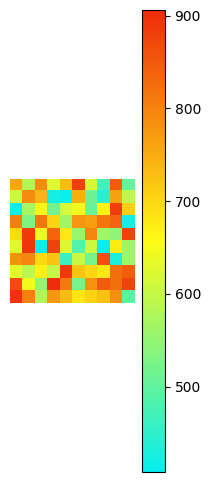

In [ ]:
#barra de calor
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

data = np.random.randint(408,908, (10, 10))

fig, ax = plt.subplots(figsize=(2, 6))  # Ajusta el tamaño según tus preferencias

colors = ['#06EEEF', '#FFFB15', '#EE2B0A']
cmap = mcolors.LinearSegmentedColormap.from_list('custom', colors, N=256)

cax = ax.matshow(data, cmap=cmap)

ax.axis('off')

cbar = fig.colorbar(cax)

cbar.formatter = ticker.FuncFormatter(lambda x, pos: f'{int(x):,}')
cbar.update_ticks()

plt.show()